<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/9_2_Clase13N_03_machine_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: práctica

Vamos a utilizar un dataset de coches `cars.csv`

Queremos predecir la variable `mpg` (miles per gallon)

La métrica para evaluar modelos será RMSE

In [ ]:
import pandas as pd
import seaborn as sns

## Carga y exploración

Carga el dataset y explóralo

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/cars.csv")

In [ ]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0
...,...,...,...,...,...,...,...,...,...
383,4,140.0,86,2790,15.6,82.0,1,ford mustang gl,27.0
384,4,97.0,52,2130,24.6,82.0,2,vw pickup,44.0
385,4,135.0,84,2295,11.6,82.0,1,dodge rampage,32.0
386,4,120.0,79,2625,18.6,82.0,1,ford ranger,28.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0


In [ ]:
df.sample(3)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
311,4,108.0,75,2265,15.2,80.0,3,toyota corolla,32.2
245,4,140.0,88,2720,15.4,78.0,1,ford fairmont (man),25.1
240,8,318.0,140,3735,13.2,78.0,1,dodge diplomat,19.4


In [ ]:
df.shape

(388, 9)

<Axes: xlabel='cylinders', ylabel='mpg'>

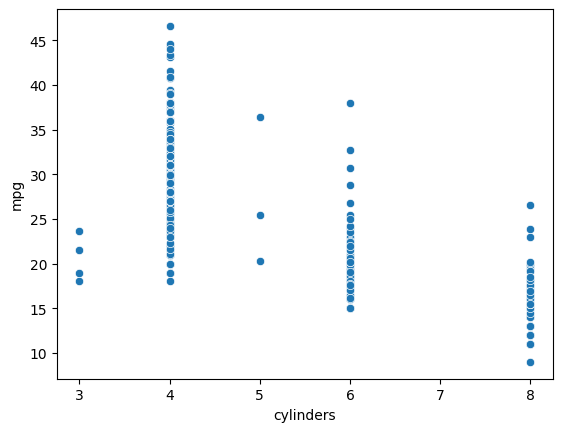

In [ ]:
sns.scatterplot(x=df.cylinders, y=df.mpg)

<Axes: xlabel='weight', ylabel='mpg'>

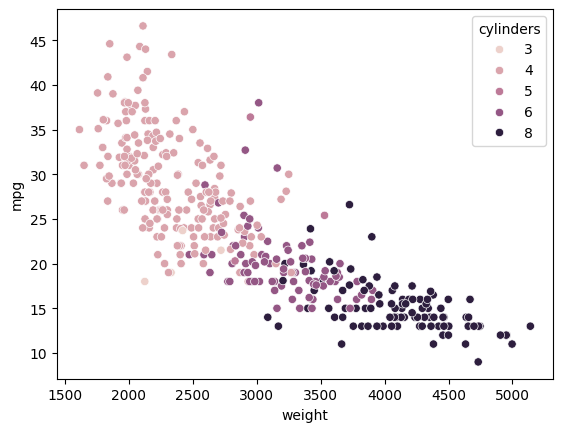

In [ ]:
sns.scatterplot(x=df.weight, y=df.mpg, hue=df.cylinders)

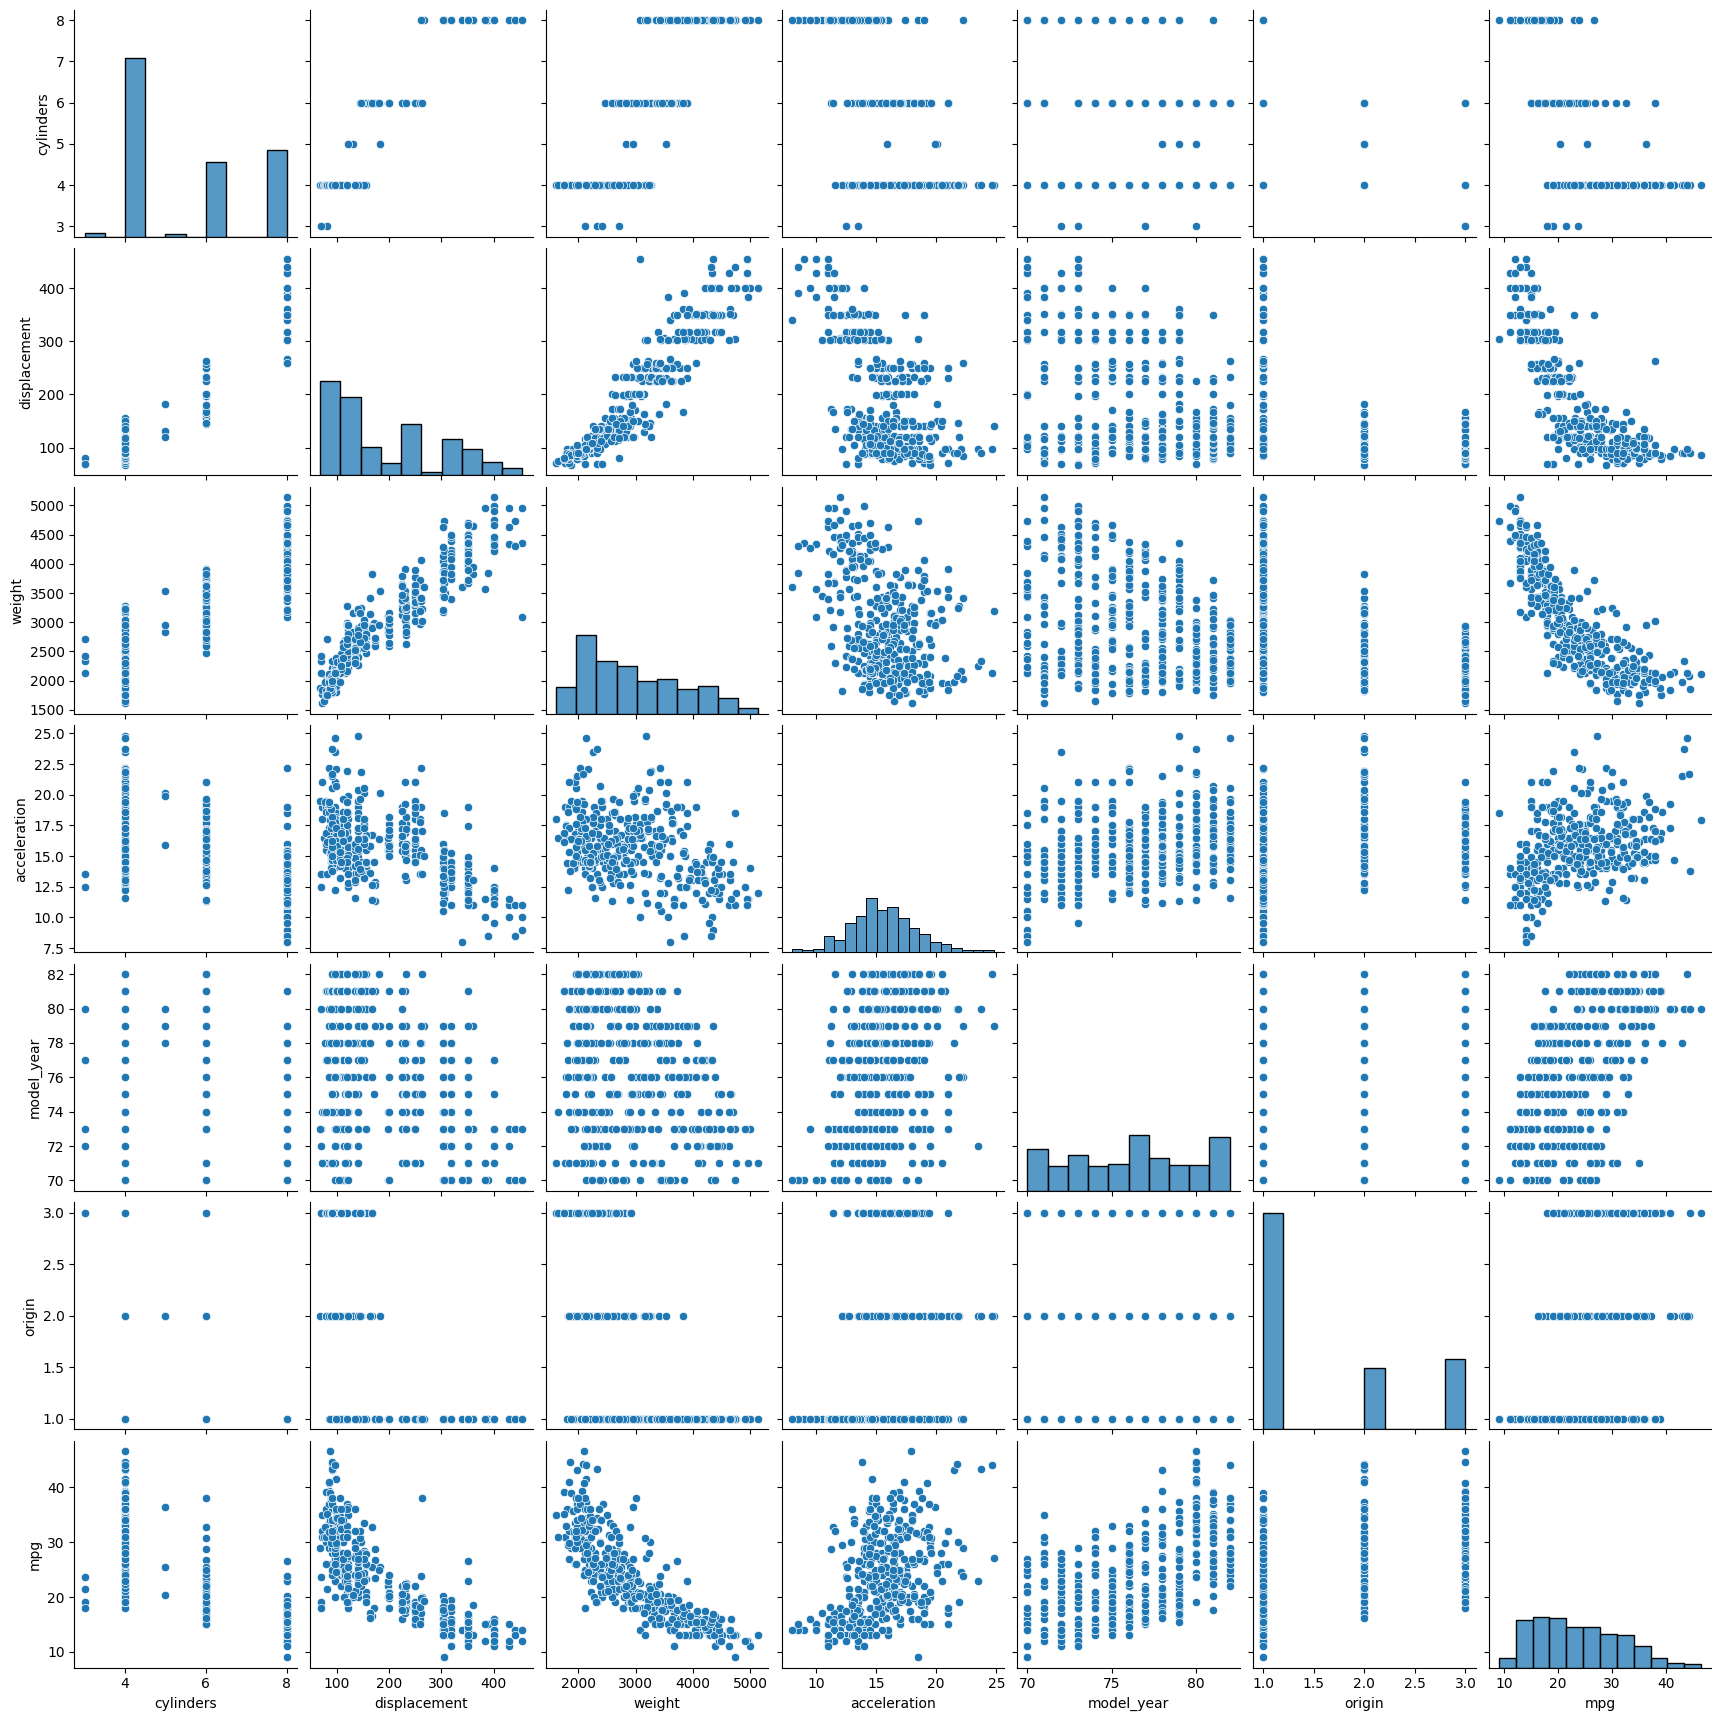

In [ ]:
sns.pairplot(df)

In [ ]:
df.sort_values("mpg").tail(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
237,4,85.0,70,2070,18.6,78.0,3,datsun b210 gx,39.4
314,4,85.0,65,2110,19.2,80.0,3,datsun 210,40.8
320,4,85.0,?,1835,17.3,80.0,2,renault lecar deluxe,40.9
299,4,98.0,76,2144,14.7,80.0,2,vw rabbit,41.5
234,4,90.0,48,1985,21.5,78.0,2,volkswagen rabbit custom diesel,43.1
316,4,90.0,48,2335,23.7,80.0,2,vw dasher (diesel),43.4
384,4,97.0,52,2130,24.6,82.0,2,vw pickup,44.0
315,4,90.0,48,2085,21.7,80.0,2,vw rabbit c (diesel),44.3
319,4,91.0,67,1850,13.8,80.0,3,honda civic 1500 gl,44.6
312,4,86.0,65,2110,17.9,80.0,3,mazda glc,46.6


<Axes: xlabel='mpg', ylabel='Count'>

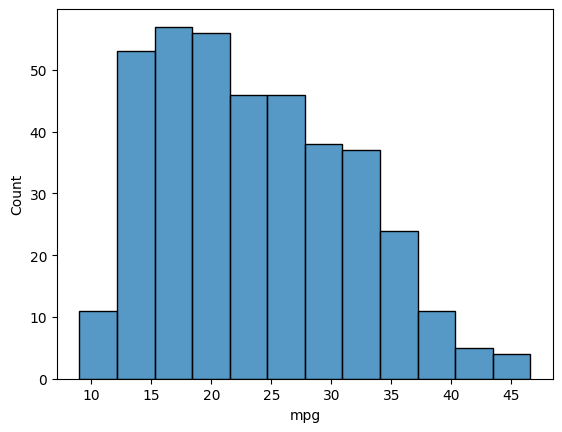

In [ ]:
sns.histplot(df.mpg)

In [ ]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0


## Modelado

Utiliza los predictores `displacement` y `acceleration`

In [ ]:
df2 = df[["displacement", "acceleration", "mpg"]].copy()

In [ ]:
df2.shape

(388, 3)

In [ ]:
df2.head()

,displacement,acceleration,mpg
0,307.0,12.0,18.0
1,350.0,11.5,15.0
2,304.0,12.0,16.0
3,302.0,10.5,17.0
4,429.0,10.0,15.0


### Primero, vamos a hacerlo "mal": sin train / test split

- Entrena un modelo con todos los coches
- Predice con el modelo sobre esos mismos coches
- Evalúa el RMSE: realidad vs predicción

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(
    X = df[["displacement", "acceleration"]],
    y = df.mpg,
)

LinearRegression()

In [ ]:
variables = lr.predict(df2[["displacement","acceleration"]]).round(1)

In [ ]:
df2["variables"] = variables

In [ ]:
df2.head()

,displacement,acceleration,mpg,variables
0,307.0,12.0,18.0,16.7
1,350.0,11.5,15.0,14.1
2,304.0,12.0,16.0,16.9
3,302.0,10.5,17.0,17.1
4,429.0,10.0,15.0,9.3


In [ ]:
df2["mse"] = (df2.mpg - df2.variables)**2

In [ ]:
df2

,displacement,acceleration,mpg,variables,mse
0,307.0,12.0,18.0,16.7,1.69
1,350.0,11.5,15.0,14.1,0.81
2,304.0,12.0,16.0,16.9,0.81
3,302.0,10.5,17.0,17.1,0.01
4,429.0,10.0,15.0,9.3,32.49
...,...,...,...,...,...
383,140.0,15.6,27.0,26.8,0.04
384,97.0,24.6,44.0,29.1,222.01
385,135.0,11.6,32.0,27.3,22.09
386,120.0,18.6,28.0,27.9,0.01


In [ ]:
df2.mse.mean().round(2)

np.float64(21.6)

In [ ]:
df2["rmse"] = df2.mse ** 0.5

In [ ]:
df2.head()

,displacement,acceleration,mpg,variables,mse,rmse
0,307.0,12.0,18.0,16.7,1.69,1.3
1,350.0,11.5,15.0,14.1,0.81,0.9
2,304.0,12.0,16.0,16.9,0.81,0.9
3,302.0,10.5,17.0,17.1,0.01,0.1
4,429.0,10.0,15.0,9.3,32.49,5.7


In [ ]:
df2.rmse.mean().round(1)

np.float64(3.5)

### Ahora, vamos a hacerlo bien: con train / test split

- Divide el dataset en train / test (80 / 20)
- Entrena un modelo con los coches de train
- Predice con el modelo sobre los coches de test
- Evalúa el RMSE sobre el test: realidad vs predicción

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0


In [ ]:
df8020 = df[["displacement", "acceleration", "mpg"]].copy()

In [ ]:
x = df8020.drop("mpg", axis=1)

In [ ]:
y = df8020.mpg

In [ ]:
x.head()

,displacement,acceleration
0,307.0,12.0
1,350.0,11.5
2,304.0,12.0
3,302.0,10.5
4,429.0,10.0


In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,16.0
3,17.0
4,15.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df8020.shape

(388, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
x_train.shape

(310, 2)

In [ ]:
x_test.shape

(78, 2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(
     x_train,
     y_train
)

LinearRegression()

In [ ]:
x_train["mpgpredicted"] = lr.predict(x_train).round(1)

In [ ]:
x_train[:5]

,displacement,acceleration,mpgpredicted
171,91.0,17.5,29.9
160,140.0,18.5,26.8
329,151.0,16.4,26.2
100,108.0,16.5,28.9
260,134.0,14.8,27.4


In [ ]:
y_train[:5]

,mpg
171,33.0
160,23.0
329,26.6
100,22.0
260,21.1


In [ ]:
mse_train = ((x_train.mpgpredicted - y_train)**2).mean().round(1)

In [ ]:
mse_train

np.float64(20.8)

Qué ocurre si evalúas el RMSE sobre el train?

In [ ]:
rmse_train = (((x_train.mpgpredicted - y_train)**2).mean().round(1))**0.5

In [ ]:
rmse_train

np.float64(4.560701700396552)

In [ ]:
x_test["predstest"] = lr.predict(x_test).round(1)

In [ ]:
x_test.head()

,displacement,acceleration,predstest
132,79.0,15.5,30.8
280,351.0,14.3,13.8
383,140.0,15.6,27.0
233,80.0,13.5,30.9
27,250.0,15.5,20.1


In [ ]:
y_test.head()

,mpg
132,26.0
280,15.5
383,27.0
233,21.5
27,19.0


In [ ]:
mse_test = ((x_test.predstest - y_test)**2).mean().round(1)

In [ ]:
mse_test

np.float64(25.1)

In [ ]:
rmse_test = mse_test**0.5

In [ ]:
rmse_test

np.float64(5.0099900199501395)

### Modelo más complejo

Haz lo mismo con un modelo más complejo (más predictores)

In [ ]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,15.0
2,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,16.0
3,8,302.0,140,3449,10.5,70.0,1,ford torino,17.0
4,8,429.0,198,4341,10.0,70.0,1,ford galaxie 500,15.0
...,...,...,...,...,...,...,...,...,...
383,4,140.0,86,2790,15.6,82.0,1,ford mustang gl,27.0
384,4,97.0,52,2130,24.6,82.0,2,vw pickup,44.0
385,4,135.0,84,2295,11.6,82.0,1,dodge rampage,32.0
386,4,120.0,79,2625,18.6,82.0,1,ford ranger,28.0


In [ ]:
dfcomplejo = df.drop(["horsepower", "car_name"], axis = 1)

In [ ]:
dfcomplejo.shape

(388, 7)

In [ ]:
dfcomplejo.columns

Index(['cylinders', 'displacement', 'weight', 'acceleration', 'model_year',
       'origin', 'mpg'],
      dtype='object')

In [ ]:
x = dfcomplejo.drop("mpg", axis=1)

In [ ]:
y = dfcomplejo.mpg

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(
    x_train,
    y_train
)

LinearRegression()

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
rmse_train = root_mean_squared_error(lr.predict(x_train), y_train)

In [ ]:
round(rmse_train, 2)

3.37

In [ ]:
rmse_test = root_mean_squared_error(y_test, lr.predict(x_test))

In [ ]:
round(rmse_test, 2)

3.23